# Validación Cruzada y Curvas de Validación

## 1. Validación Cruzada

### Carga de Datos

Scikit-Learn provee varias funciones para cargar datasets y también para generar datasets. Hoy vamos a usar el Breast Cancer Wisconsin (diagnostic) dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

`data` es un diccionario con los datos que podemos pasar a un dataframe de Pandas.

In [3]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Nos fijamos cuántos casos hay de cada etiqueta, que están en la columna `target`

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


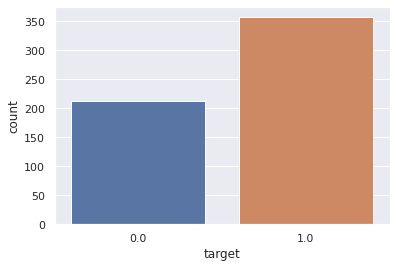

In [6]:
sns.countplot(df['target'],label="Count")
plt.show()

Para facilitar el análisis, seleccionamos solo aquellas columnas con atributos *mean*

In [7]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [8]:
df = df[features_mean + ['target']]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


Hacemos el pairplot

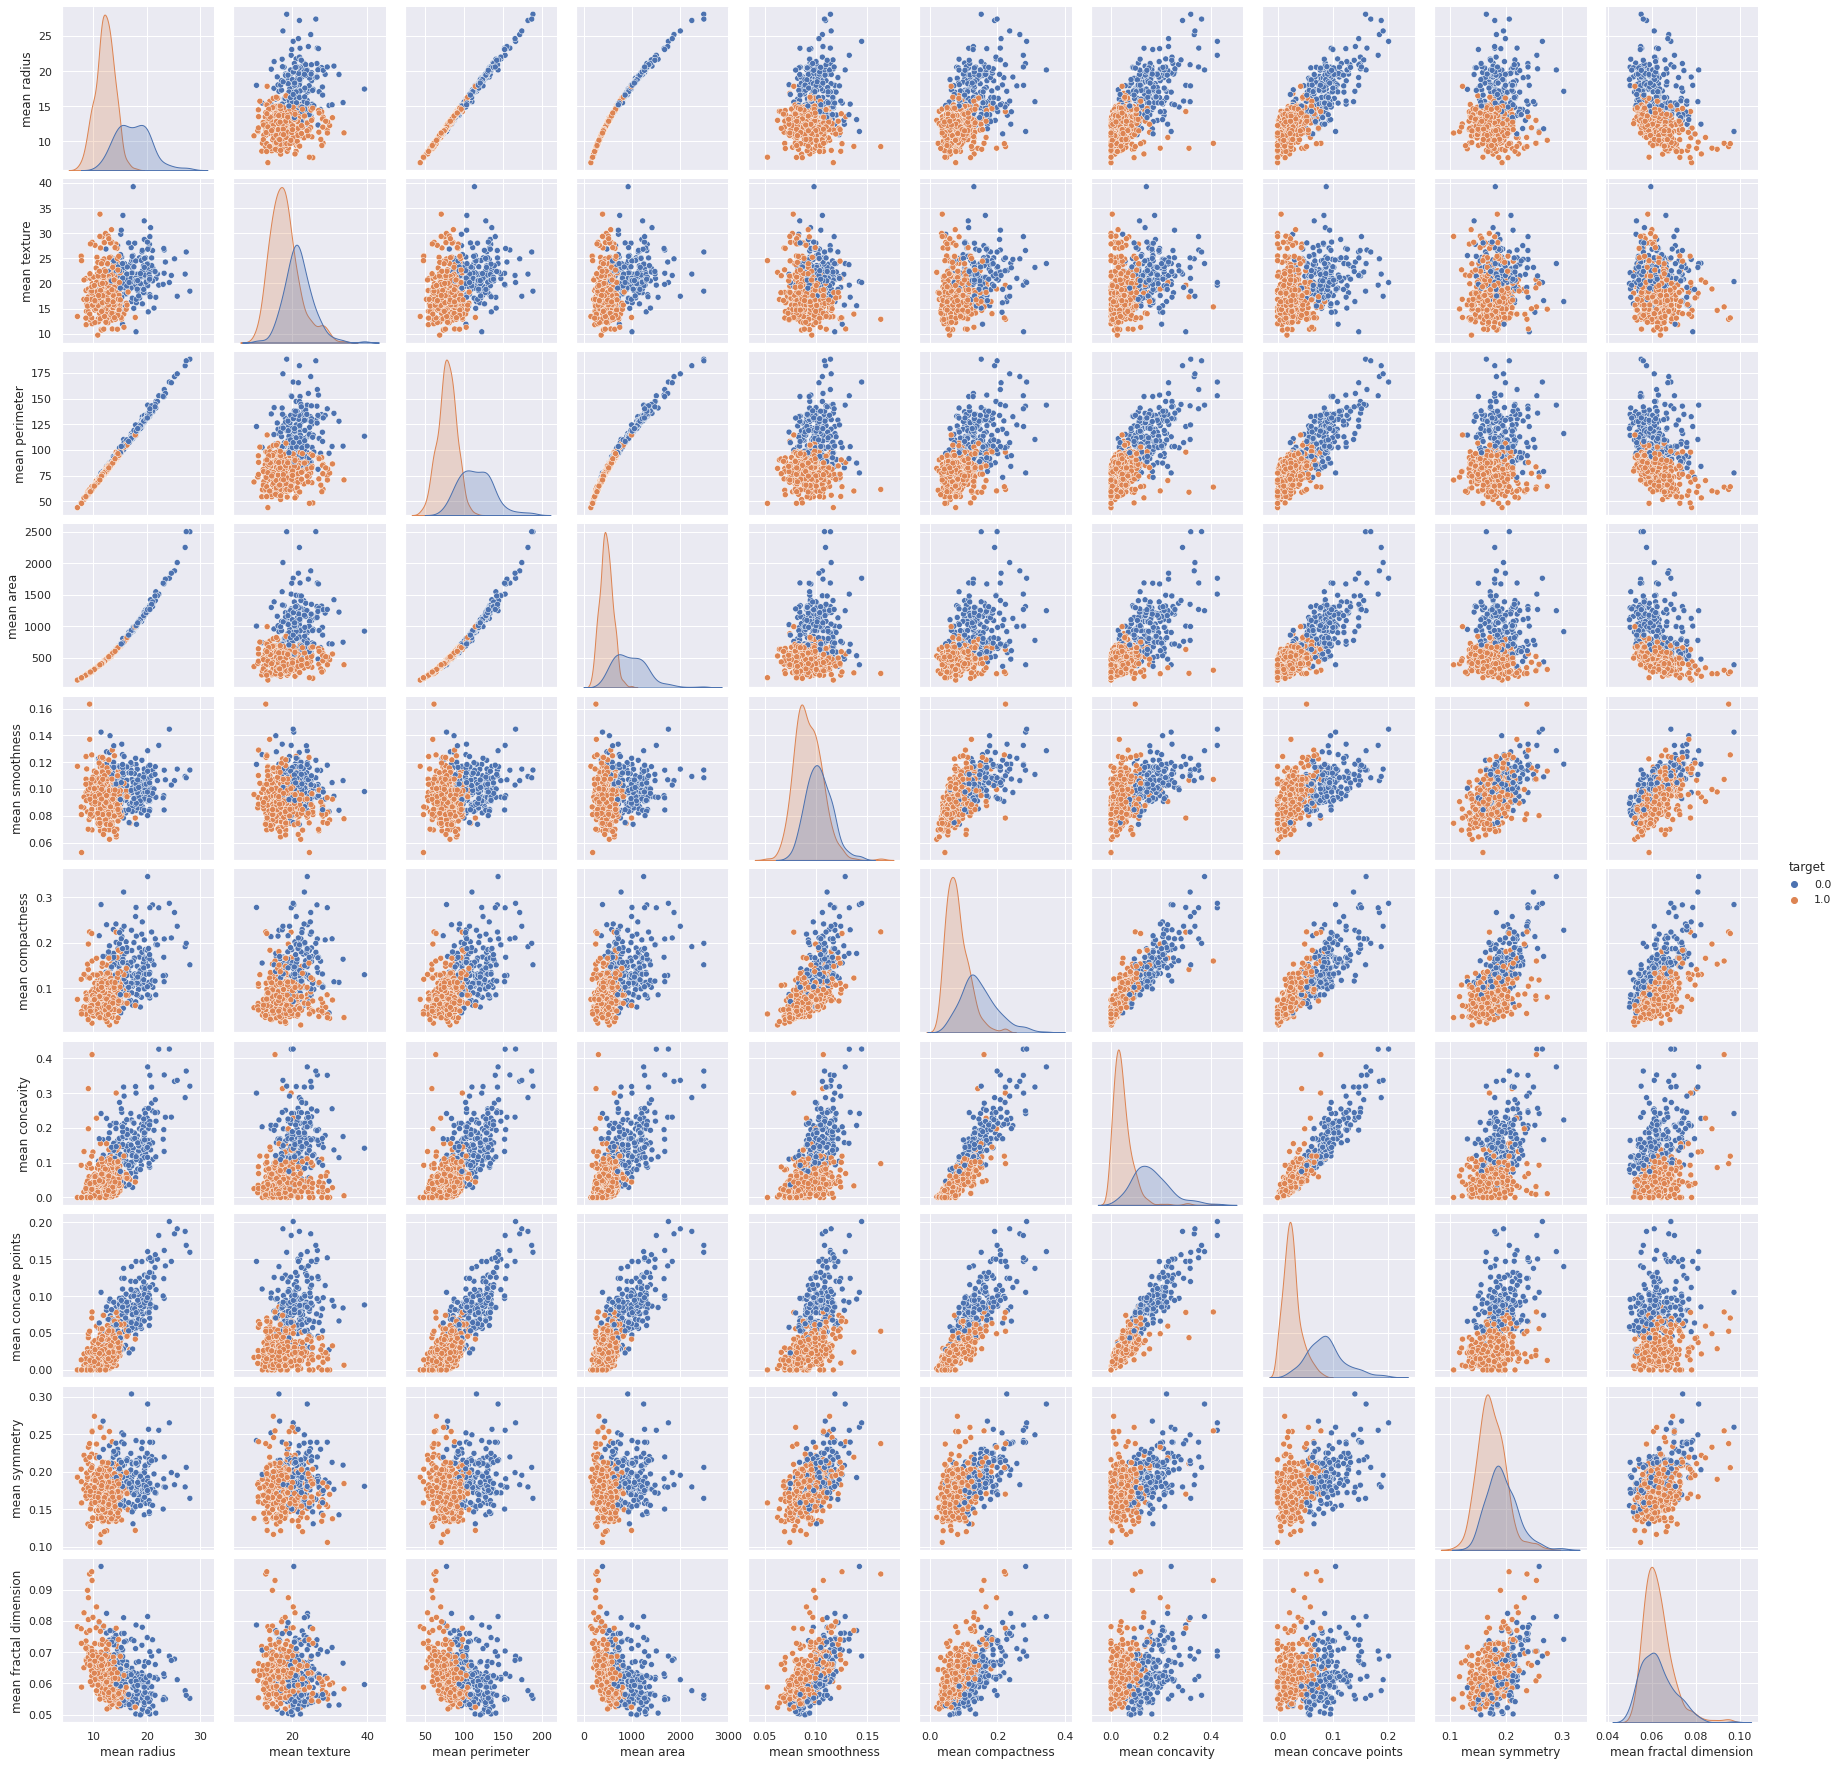

In [9]:
sns.pairplot(df, hue = 'target')

Y la matriz de correlaciones

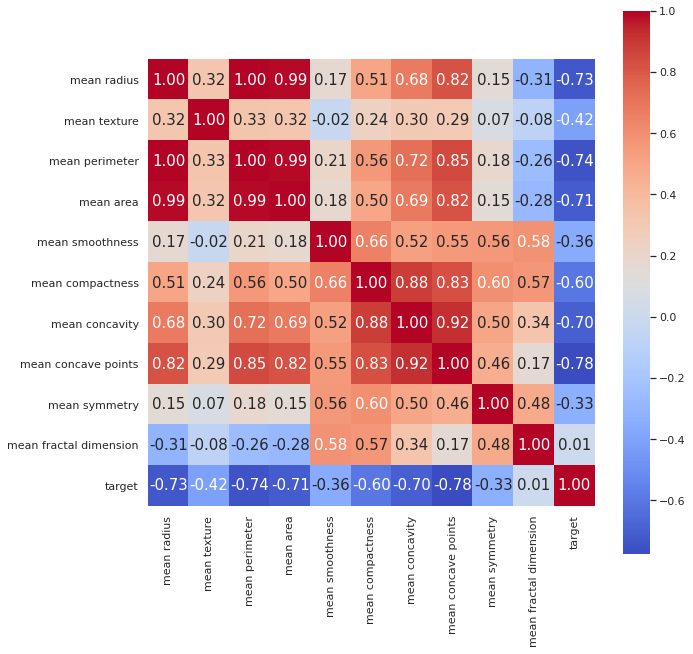

In [44]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, 
           yticklabels= df.columns,
           cmap= 'coolwarm')
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
plt.show()

### Entrenamiento de los modelos

Vamos a entrenar un Árbol de Decisión de Profundidad infinita (`max_depth = None`) y un modelo de Vecinos más cercanos con `n_neighbors=1`. Los vamos a entrenar y evaluar haciendo un `train_test_split` (con `test_size=0.10`) de los datos.

Seleccionamos las variables de entrenamiento y etiquetas

In [9]:
# X = df.drop(columns = ['target'])
X = df[['mean radius','mean smoothness', 'mean concave points']]
y = df['target']

Reescalamos los datos.

In [10]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [11]:
y.sum()/y.count()

0.6274165202108963

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60, stratify=y)

In [14]:
y_train.sum()/y_train.count()#sin stratify

0.623046875

In [15]:
y_test.sum()/y_test.count()#sin stratify

0.6666666666666666

In [17]:
y_train.sum()/y_train.count()#con stratify

0.626953125

In [18]:
y_test.sum()/y_test.count()#con stratify

0.631578947368421

Una buena práctica cuando separamos en conjuntos de train y test es chequear que las distribuciones que obtenemos sean similares. Obviamente, a medida que tenemos más features, esto se hace más difícil.

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


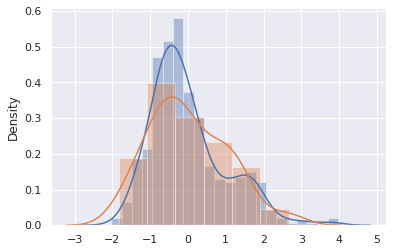

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


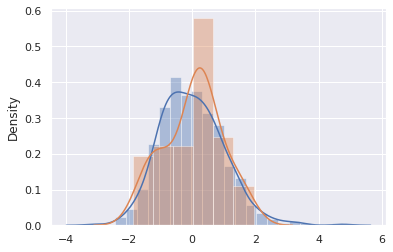

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


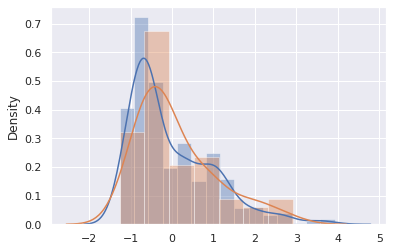

In [57]:
for i in range(X_train.shape[1]):
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

¿Será suficiente chequear esto

Otras cosa que podemos chequear es que la proporción de cada clase en las etiquetas en ambos conjuntos sea parecida.

In [19]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  0.626953125
Proporcion de etiquetas positiva en los datos de Test:  0.631578947368421


Y si no lo fuera, ¿qué podemos hacer?¿Qué hace el parámetro `stratify` de la función `train_test_split`?

**Para pensar**: ¿cuál será desempeño aproximado del modelo más sencillo que podemos crear?

#### Entrenamiento de los modelos

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

**Árbol de Decisión**

In [21]:
tree = DecisionTreeClassifier(max_depth = None)
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.8947368421052632


**KNN**

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = knn.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.8070175438596491


¿Qué ocurre con estos modelos?¿El desempeño depende de la partición hecha de los datos? Modificar el `random_state` del `train_test_split` y volver a correr.

### Validación Cruzada

Scikit-Learn tiene varias funciones ya incorporadas que evalúan los modelos usando validación cruzada. Las más sencilla de usar es `cross_val_score`, que evalúa un (1) score - para clasificaciones por default es Accuracy - y un modelo por CV.

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X, y, cv=5)

knn = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X, y, cv=5)

In [27]:
print(tree_scores, knn_scores)

[0.85964912 0.88596491 0.92105263 0.92982456 0.86725664] [0.87719298 0.88596491 0.87719298 0.92105263 0.89380531]


In [28]:
# print(tree_scores.mean(), knn_scores.mean())
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

Accuracy para Tree: 0.89 (+/- 0.06)
Accuracy para KNN: 0.89 (+/- 0.03)


Notar que ahora obtenemos una evaluación del modelo que no depende tanto de la partición hecha.

`cross_validate` es una función muy parecida, pero un poco más versátil e informativa. Además de devolver los scores, devuelve algunas métricas que pueden ser útiles, como tiempo de fiteo, los modelos entrenados, etc. Además, permite evaluar más de una métrica.

In [29]:
from sklearn.model_selection import cross_validate

In [30]:
tree_scores = cross_validate(tree, X, y, cv=5, scoring = ['precision','recall'])
knn_scores = cross_validate(knn, X, y, cv=5, scoring = ['precision','recall'])

In [31]:
print(tree_scores)
print(knn_scores)

{'fit_time': array([0.00195432, 0.00787568, 0.00603175, 0.0017519 , 0.01035786]), 'score_time': array([0.01317692, 0.01643085, 0.01844811, 0.00349307, 0.00547504]), 'test_precision': array([0.87012987, 0.88157895, 0.95652174, 0.90540541, 0.96774194]), 'test_recall': array([0.94366197, 0.94366197, 0.91666667, 0.93055556, 0.84507042])}
{'fit_time': array([0.00172806, 0.00200367, 0.00208998, 0.00138664, 0.0013833 ]), 'score_time': array([0.01582766, 0.01444793, 0.02410245, 0.0234251 , 0.01939583]), 'test_precision': array([0.89041096, 0.88157895, 0.90277778, 0.94366197, 0.94029851]), 'test_recall': array([0.91549296, 0.94366197, 0.90277778, 0.93055556, 0.88732394])}


La siguiente celda imprime una lista de todas las métricas que podemos usar para evaluar con `cross_validate`

In [32]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 2. Curvas de Validación

Podemos hacer curvas de validacion usando los conjuntos de train y de test que creamos.

In [33]:
scores_train = []
scores_test = []
profundidades = np.arange(1,50)
for max_depth in profundidades:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    scores_train.append(accuracy_score(y_train, y_pred_train))
    scores_test.append(accuracy_score(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

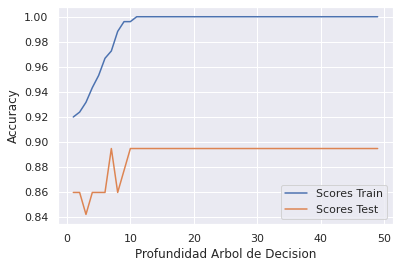

In [34]:
plt.plot(profundidades,scores_train, label = 'Scores Train')
plt.plot(profundidades,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

**Ejercicio:** Hacer una curva de validación para un modelo de Vecino más Cercanos en función de la cantidad de vecinos.

In [35]:
scores_train = []
scores_test = []
n_vecinos = np.arange(1,50,1)
for vecinos in n_vecinos:
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    scores_train.append(accuracy_score(y_train, y_pred_train))
    scores_test.append(accuracy_score(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

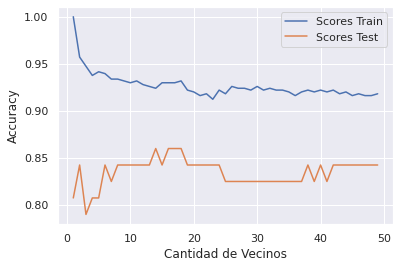

In [36]:
plt.plot(profundidades,scores_train, label = 'Scores Train')
plt.plot(profundidades,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

Pero la curva es más informativa si usamos validación cruzada

In [37]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

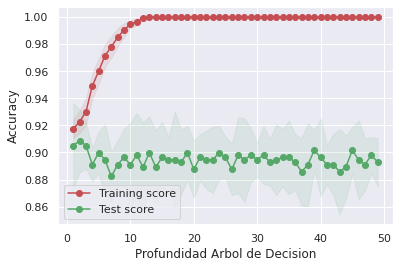

In [38]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

**Ejercicio:** Hacer una curva de validación para un modelo de Vecino más Cercanos en función de la cantidad de vecinos usando Validación Cruzada.

In [39]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,100,1)

for vecinos in n_vecinos:
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=10, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

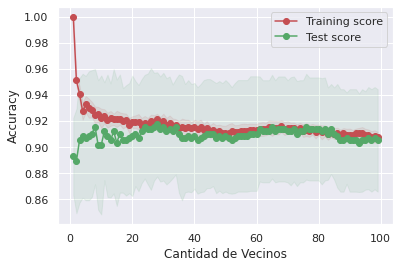

In [40]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()